In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/AIFMData 

/content/drive/.shortcut-targets-by-id/1KZFHwIdxRdOOgnEo0gNT1zrrQBGfQ58t/AIFMData


In [ ]:
pip install lvm_read 

In [ ]:
import lvm_read
import numpy as np
import matplotlib.pyplot as plt
import urllib 

# Import The Data

In [ ]:
lvm = lvm_read.read('Vib_Pow_1440_Cage.lvm')
lvm1 = lvm_read.read('Vib_Pow_1440_OR.lvm')
lvm2 = lvm_read.read('Vib_Pow_1440_IR.lvm')
lvm3 = lvm_read.read('Vib_Pow_1440_healthy.lvm')

In [ ]:
lvm

{0: {'Channel names': ['X_Value', 'Vibration', 'X_Value', 'Power', 'Comment'],
  'Channels': 2,
  'Date': ['2019/03/24', '', '2019/03/24', ''],
  'Delta_X': [0.0005, nan, 0.0005, nan],
  'Samples': [2000, nan, 2000, nan],
  'Time': ['13:30:42.2719481499427939381',
   '',
   '13:30:42.271962149583735558',
   ''],
  'X0': [0.0, nan, 0.0, nan],
  'X_Dimension': ['Time', '', 'Time', ''],
  'Y_Unit_Label': ['Volts', '', 'Volts', ''],
  'data': array([[ 0.000000e+00,  7.311700e-02,  0.000000e+00, -1.106000e-02],
         [ 5.000000e-04,  2.829030e-01,  5.000000e-04, -7.115000e-03],
         [ 1.000000e-03,  5.127460e-01,  1.000000e-03, -1.434900e-02],
         ...,
         [ 9.919985e+02,  1.869779e+00,  9.919985e+02,  5.503200e-02],
         [ 9.919990e+02,  1.974672e+00,  9.919990e+02,  5.338800e-02],
         [ 9.919995e+02,  2.265347e+00,  9.919995e+02,  5.141500e-02]])},
 'Date': '2019/03/24',
 'Decimal_Separator': '.',
 'Multi_Headings': 'No',
 'Operator': 'User',
 'Reader_Version': '

In [ ]:
X = lvm[0]['data']

In [ ]:
X = lvm[0]['data']
data_t = X[:,3]
data_t

array([-0.01106 , -0.007115, -0.014349, ...,  0.055032,  0.053388,
        0.051415])

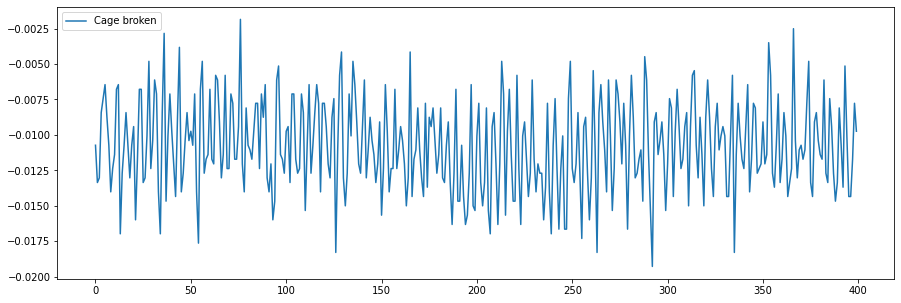

In [ ]:
X = lvm[0]['data']
data_t = X[:,3]
fig = plt.figure(figsize=(15,5))
plt.plot(data_t[1600:2000])
plt.legend(['Cage broken'])
plt.show()

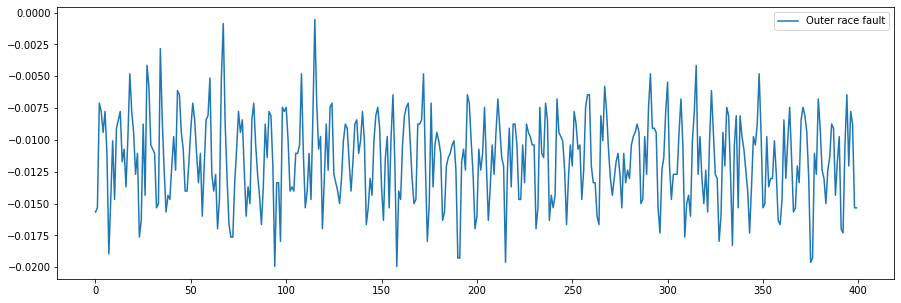

In [ ]:
X = lvm1[0]['data']
data_t = X[:,3]
fig = plt.figure(figsize=(15,5))
plt.plot(data_t[1600:2000])
plt.legend(['Outer race fault'])
plt.show()

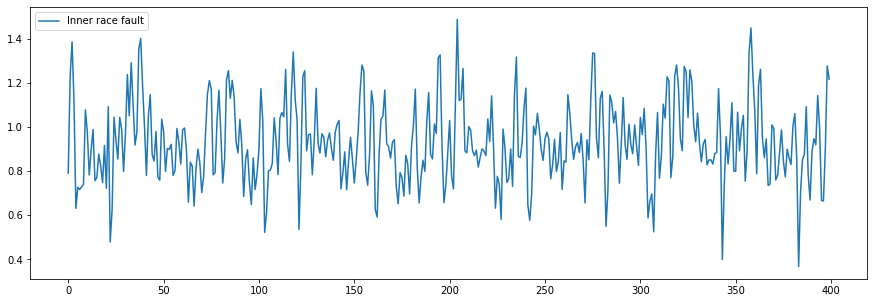

In [ ]:
X = lvm2[0]['data']
data_t = X[:,3]
fig = plt.figure(figsize=(15,5))
plt.plot(data_t[1600:2000])
plt.legend(['Inner race fault'])
plt.show()

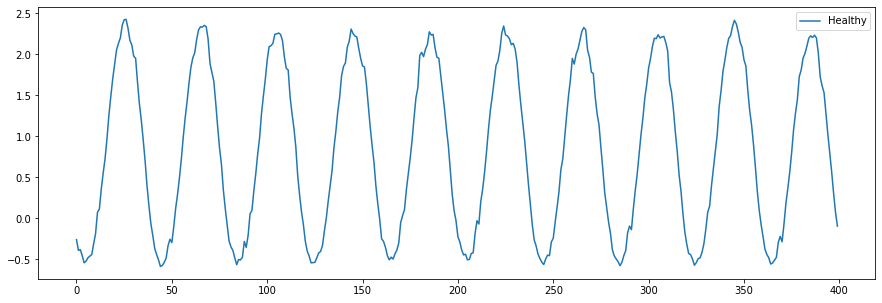

In [ ]:
X = lvm3[0]['data']
data_t = X[:,3]
fig = plt.figure(figsize=(15,5))
plt.plot(data_t[1600:2000])
plt.legend(['Healthy'])
plt.show() 

Creating Segmented Dataset

In [ ]:
class segmentor:
    def __init__(self,sequence_length):
        import numpy as np
        self.X_data = []
        self.y_data = []
        self.l = sequence_length
    def addarray(self, data_t, class_type, n):
        import random
        done_locations = set()
        i = 0
        while i < n:
            start = random.randint(0,len(data_t)-1)
            if start not in done_locations:
                i+=1
                done_locations.add(start)
                self.X_data.append(data_t[start:start+self.l])
                self.y_data.append(class_type)
        pass
    def returndata(self):
        import pandas as pd
        X_data = np.array(self.X_data)
        y_data = np.array(self.y_data)
        df = pd.DataFrame(X_data, columns = ['col_'+str(i) for i in range(self.l)]) 
        df['class'] = y_data
        df = df.sample(frac=1)
        return df

In [ ]:
#for power and Vibration 
class segmentor:
    def __init__(self,sequence_length):
        import numpy as np
        self.X_data = []
        self.y_data = []
        self.l = sequence_length
    def addarray(self, data_t, class_type, n):
        import random
        done_locations = set()
        i = 0
        while i < n:
            start = random.randint(0,len(data_t)-1)
            if start not in done_locations:
                i+=1
                done_locations.add(start)
                self.X_data.append(data_t[start:start+self.l])
                self.y_data.append(class_type)
        pass
    def returndata(self):
        import pandas as pd
        X_data = np.array(self.X_data)
        # y_data = np.array(self.y_data)
        df = pd.DataFrame(X_data, columns = ['col_'+str(i) for i in range(self.l)]) 
        df['class'] = self.y_data
        # df = df.sample(frac=1)
        return df

In [ ]:
seq_length = 50
n_samples = 100000

In [ ]:
X = lvm[0]['data']
data_t1 = X[:,1]
X1 = lvm1[0]['data']
data_t2 = X1[:,1]
X2 = lvm2[0]['data']
data_t3 = X2[:,1]
X3 = lvm3[0]['data']
data_t4 = X3[:,1]

In [ ]:
s = segmentor(seq_length)
s.addarray(data_t1, 1, n_samples)
s.addarray(data_t2, 2, n_samples)
s.addarray(data_t3, 3, n_samples)
s.addarray(data_t4, 4, n_samples)
df = s.returndata()

In [ ]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_361,col_362,col_363,col_364,col_365,col_366,col_367,col_368,col_369,col_370,col_371,col_372,col_373,col_374,col_375,col_376,col_377,col_378,col_379,col_380,col_381,col_382,col_383,col_384,col_385,col_386,col_387,col_388,col_389,col_390,col_391,col_392,col_393,col_394,col_395,col_396,col_397,col_398,col_399,class
2195,2.196624,2.116064,2.264690,2.118694,1.746801,1.793822,1.510052,1.343670,1.384443,1.184850,0.834330,0.623229,0.545957,0.325320,0.214837,0.171762,0.048784,-0.017966,0.186559,0.181298,0.128030,0.140196,0.391084,0.521953,0.569961,0.605473,0.770211,0.944813,1.148352,1.425874,1.416338,1.695176,1.891152,2.037147,2.227862,2.201885,2.203530,2.127244,2.286063,2.312040,...,1.977631,2.025968,2.107186,2.033859,1.561347,1.550825,1.338408,1.091466,1.012221,0.806052,0.543326,0.385823,0.300988,0.137894,0.045167,0.056676,0.016231,-0.093594,-0.082414,-0.016979,0.008340,0.070158,0.337158,0.389769,0.463424,0.731410,0.910616,0.940867,1.236146,1.483746,1.547537,1.677420,1.967438,1.937844,2.252852,2.292639,2.190048,2.170319,2.266663,3
2266,1.995387,2.039778,2.035832,2.303819,2.386353,2.276527,2.214709,2.215038,2.364651,2.154536,1.732004,1.705698,1.689586,1.454152,1.348273,1.216746,0.905026,0.690966,0.591663,0.369382,0.186230,0.162227,0.168145,-0.161659,-0.117269,-0.086031,-0.125489,-0.010732,0.154664,0.300330,0.403908,0.318744,0.575551,0.660057,0.902067,1.129609,1.284153,1.401542,1.764557,1.950010,...,1.764228,2.096006,2.257785,2.256141,2.182485,2.172621,2.284748,2.496507,2.130861,2.147302,2.031557,1.788561,1.620206,1.544577,1.236146,1.018468,0.899107,0.675511,0.405881,0.195108,0.316771,0.164199,0.050757,0.042866,-0.026515,-0.019938,0.103697,0.123097,0.198725,0.178010,0.459807,0.679457,0.632107,0.868199,0.925084,1.099686,1.387731,1.648484,1.702410,3
2277,1.333805,1.553784,1.831307,1.842816,2.069372,1.996045,2.109816,2.293626,2.465598,2.327823,2.264032,2.170319,2.124284,2.047341,1.835910,1.579761,1.710959,1.390362,1.229898,1.125334,0.849785,0.599883,0.477563,0.391084,0.236868,0.061280,0.083639,-0.202432,-0.247809,-0.142587,-0.097539,0.141511,-0.083400,0.140196,0.372341,0.356229,0.583771,0.766594,0.884968,1.025702,...,1.628755,1.822758,1.846433,2.096664,1.956916,1.992099,2.193336,2.439950,2.332098,2.233781,2.167031,2.198597,2.041751,1.868792,1.635002,1.549510,1.377209,1.110209,1.154599,0.901409,0.637368,0.471315,0.388124,0.202671,0.083310,0.067856,0.012614,-0.083400,-0.033420,0.095805,0.226675,0.027411,0.264818,0.531160,0.426267,0.629806,0.889572,0.990190,1.129280,3
2753,-0.012047,-0.024213,0.072788,0.068514,0.033988,0.096463,0.517350,0.639670,0.448298,0.693925,0.803093,1.040499,1.240749,1.470593,1.601463,1.707342,1.911868,1.971384,2.157495,2.142369,2.073317,2.249893,2.406411,2.254825,2.150919,2.083840,2.041093,1.908579,1.711946,1.532411,1.300923,1.075683,0.954349,0.812300,0.494990,0.317429,0.288821,0.178010,0.011628,0.010313,...,-0.026844,0.000119,-0.018623,0.041222,0.143813,0.233580,0.294740,0.334856,0.341761,0.637368,0.858334,0.997424,1.084561,1.315391,1.525835,1.826375,1.909895,2.172292,2.054904,2.087128,2.242001,2.403780,2.262059,2.165387,2.084826,2.129217,1.997032,1.845117,1.625796,1.665254,1.403514,1.340381,1.174657,0.888585,0.600870,0.525241,0.385165,0.229305,0.113562,3
522,-0.069261,-0.038023,0.051086,0.245417,0.207275,0.334527,0.385165,0.671237,0.801777,0.983943,1.252587,1.467963,1.636647,1.797768,1.939488,1.977960,2.065755,2.254825,2.312040,2.402465,2.234767,2.187746,2.162756,2.024652,1.937844,1.777710,1.773764,1.555428,1.384772,1.161833,0.957966,0.828412,0.623887,0.418047,0.257255,0.068185,0.047469,0.016889,-0.058410,-0.070576,...,-0.062685,0.026096,0.221414,0.401935,0.592649,0.480193,0.677813,0.947115,1.030635,1.201291,1.450207,1.703068,1.798096,2.02498

Generating Training and Testing Data

In [ ]:
data = df.to_numpy()

In [ ]:
X = data[:,:-1]
y = data[:,-1]
X = (X - X.min()) / (X.max() - X.min())

Model Creation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
from itertools import combinations
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model,Sequential
from keras.layers import Dense, Embedding, Input, Bidirectional,LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D, Dropout, concatenate
from keras.preprocessing import text as keras_text, sequence as keras_seq
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_train = y_train -1
y_test = y_test - 1

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Shailesh

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout  
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3000, 1, 400) (3000, 4) (1000, 1, 400) (1000, 4)


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences =True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units = 50, return_sequences =False))
regressor.add(Dense(units=32,activation='relu'))
# regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dense(units = 4,activation='softmax')) 

regressor.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_test, y_test), verbose=2, shuffle=False)

#LSTM with batch-normalization. Loss better than vanilla LSTM and accuracy is almost the same.

Epoch 1/100
94/94 - 5s - loss: 1.3872 - accuracy: 0.2557 - val_loss: 1.3798 - val_accuracy: 0.2840 - 5s/epoch - 57ms/step
Epoch 2/100
94/94 - 1s - loss: 1.3697 - accuracy: 0.2890 - val_loss: 1.3289 - val_accuracy: 0.3940 - 524ms/epoch - 6ms/step
Epoch 3/100
94/94 - 1s - loss: 1.1589 - accuracy: 0.4707 - val_loss: 0.9054 - val_accuracy: 0.6410 - 543ms/epoch - 6ms/step
Epoch 4/100
94/94 - 1s - loss: 0.7765 - accuracy: 0.7047 - val_loss: 0.6558 - val_accuracy: 0.8380 - 623ms/epoch - 7ms/step
Epoch 5/100
94/94 - 1s - loss: 0.6274 - accuracy: 0.7853 - val_loss: 0.5596 - val_accuracy: 0.8500 - 551ms/epoch - 6ms/step
Epoch 6/100
94/94 - 1s - loss: 0.5377 - accuracy: 0.8397 - val_loss: 0.4973 - val_accuracy: 0.8620 - 561ms/epoch - 6ms/step
Epoch 7/100
94/94 - 1s - loss: 0.4781 - accuracy: 0.8607 - val_loss: 0.4507 - val_accuracy: 0.8640 - 525ms/epoch - 6ms/step
Epoch 8/100
94/94 - 1s - loss: 0.4325 - accuracy: 0.8750 - val_loss: 0.4139 - val_accuracy: 0.8770 - 565ms/epoch - 6ms/step
Epoch 9/10

Bi-Directional LSTM Model

In [ ]:
l1 = X_train.shape[1]
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True),input_shape=(l1,1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
batch_size = 128 # large enough that some other labels come in
epochs = 50

file_path="best_weights_"+str(l1)+".h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=2, save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

callbacks_list = [checkpoint, early] #early
history=model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          batch_size=batch_size, 
          epochs=epochs, 
          shuffle = True,
          callbacks=callbacks_list)